## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
import numpy as np
import pandas as pd
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from keras.datasets import boston_housing
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [0]:
#Load the data
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [0]:
#Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train.reshape(-1,1))
y_test = scaler.transform(y_test.reshape(-1,1))

In [0]:
#instantiate model
k_model = Sequential()

#hidden layer
k_model.add(Dense(5, input_dim=13, activation="relu"))

#output layer
k_model.add(Dense(1, activation='relu'))

#compile the model            
k_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

#inspect the model summary
k_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_134 (Dense)            (None, 5)                 70        
_________________________________________________________________
dense_135 (Dense)            (None, 1)                 6         
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________


In [0]:
#fit the model
history = k_model.fit(X_train, y_train, epochs=300, verbose=0)

#get y_pred
kmodel_y_pred = k_model.predict(X_test)

#get the mean squared error of the test set predictions
k_model_mse = mean_squared_error(y_test, kmodel_y_pred)
k_model_mse

0.00914412987037168

In [0]:
#Linear Regression Model:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lr_y_pred = lin_reg.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_mse

0.011454616916752059

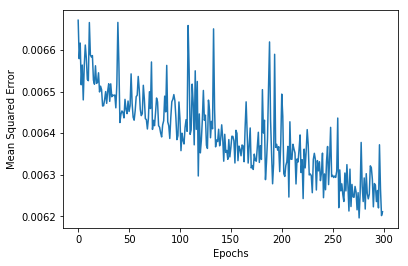

In [0]:
from matplotlib import pyplot as plt

x_vals = list(range(300))
y_vals = history.history['mean_squared_error']

plt.plot(x_vals, y_vals)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [0]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [0]:
from keras import utils

#reshape
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

#normalize and convert to float
X_train = X_train / 255.0
X_test = X_test/ 255.0

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#convert y to categorical
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [0]:
mnist_model = Sequential()

#Hidden Layers
mnist_model.add(Dense(128, input_dim=784, activation='relu'))

#Output layer
mnist_model.add(Dense(10, activation='softmax'))

mnist_model.compile(loss='categorical_crossentropy',
                   optimizer='adam', metrics=['accuracy'])
mnist_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_139 (Dense)            (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
%%time
history = mnist_model.fit(X_train, y_train, epochs=10, 
                          validation_split=.1, verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 20s 361us/step - loss: 0.5077 - acc: 0.8226 - val_loss: 0.4127 - val_acc: 0.8532
Epoch 2/10
54000/54000 [==============================] - 15s 280us/step - loss: 0.3835 - acc: 0.8625 - val_loss: 0.3605 - val_acc: 0.8695
Epoch 3/10
54000/54000 [==============================] - 15s 274us/step - loss: 0.3442 - acc: 0.8764 - val_loss: 0.3810 - val_acc: 0.8515
Epoch 4/10
54000/54000 [==============================] - 16s 297us/step - loss: 0.3181 - acc: 0.8834 - val_loss: 0.3386 - val_acc: 0.8687
Epoch 5/10
54000/54000 [==============================] - 15s 285us/step - loss: 0.2992 - acc: 0.8912 - val_loss: 0.3306 - val_acc: 0.8838
Epoch 6/10
54000/54000 [==============================] - 15s 284us/step - loss: 0.2839 - acc: 0.8960 - val_loss: 0.3238 - val_acc: 0.8833
Epoch 7/10
54000/54000 [==============================] - 15s 281us/step - loss: 0.2729 - acc: 0.8983 - val_loss: 0.3

In [0]:
scores = mnist_model.evaluate(X_test, y_test)
print(f'{mnist_model.metrics_names[1]}: {scores[1]*100}')

10000/10000 [==============================] - 1s 136us/step
acc: 87.81


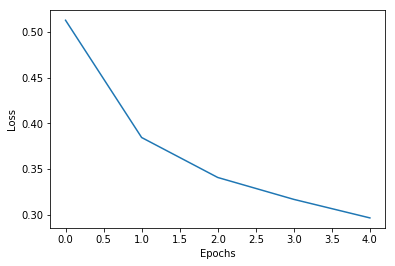

In [0]:
x_vals = list(range(10))
y_vals = history.history['loss']

plt.plot(x_vals, y_vals)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

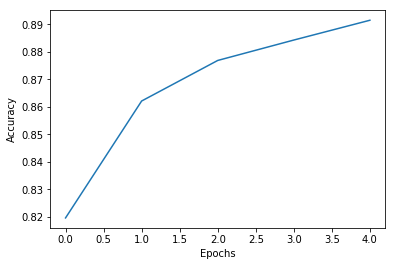

In [0]:
x_vals = list(range(10))
y_vals = history.history['acc']

plt.plot(x_vals, y_vals)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Same Model but w/ batch size of 32

In [0]:
mnist_model = Sequential()

#Hidden Layers
mnist_model.add(Dense(128, input_dim=784, activation='relu'))

#Output layer
mnist_model.add(Dense(10, activation='softmax'))

mnist_model.compile(loss='categorical_crossentropy',
                   optimizer='adam', metrics=['accuracy'])
mnist_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_140 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_141 (Dense)            (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
%%time
#run again w/ 10 epochs and try w/ batch_size=32
history = mnist_model.fit(X_train, y_train, batch_size=32, epochs=10, 
                          validation_split=.1, verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 21s 381us/step - loss: 0.5107 - acc: 0.8199 - val_loss: 0.4058 - val_acc: 0.8577
Epoch 2/10
54000/54000 [==============================] - 15s 276us/step - loss: 0.3834 - acc: 0.8626 - val_loss: 0.3742 - val_acc: 0.8640
Epoch 3/10
54000/54000 [==============================] - 16s 287us/step - loss: 0.3413 - acc: 0.8762 - val_loss: 0.3898 - val_acc: 0.8620
Epoch 4/10
54000/54000 [==============================] - 15s 276us/step - loss: 0.3155 - acc: 0.8839 - val_loss: 0.3358 - val_acc: 0.8790
Epoch 5/10
54000/54000 [==============================] - 18s 341us/step - loss: 0.2995 - acc: 0.8915 - val_loss: 0.3298 - val_acc: 0.8822
Epoch 6/10
54000/54000 [==============================] - 16s 305us/step - loss: 0.2828 - acc: 0.8971 - val_loss: 0.3307 - val_acc: 0.8853
Epoch 7/10
54000/54000 [==============================] - 16s 288us/step - loss: 0.2724 - acc: 0.8987 - val_loss: 0.3

In [0]:
scores = mnist_model.evaluate(X_test, y_test)
print(f'{mnist_model.metrics_names[1]}: {scores[1]*100}')

10000/10000 [==============================] - 1s 117us/step
acc: 88.26


## Extra Hidden Layer + Dropout

In [0]:
mnist_model = Sequential()

# Hidden
mnist_model.add(Dense(128, input_dim=784, activation='relu'))
mnist_model.add(Dropout(0.2))
mnist_model.add(Dense(16, activation='relu'))
mnist_model.add(Dropout(0.2))

# Output Layer
mnist_model.add(Dense(10, activation='softmax'))

mnist_model.compile(loss='categorical_crossentropy',
                    optimizer='adam', 
                    metrics=['accuracy'])
mnist_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_142 (Dense)            (None, 128)               100480    
_________________________________________________________________
dropout_28 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_143 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_29 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_144 (Dense)            (None, 10)                170       
Total params: 102,714
Trainable params: 102,714
Non-trainable params: 0
_________________________________________________________________


In [0]:
%%time
history = mnist_model.fit(X_train, y_train, epochs=10, 
                          validation_split=.1, verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 22s 403us/step - loss: 0.7312 - acc: 0.7397 - val_loss: 0.4315 - val_acc: 0.8442
Epoch 2/10
54000/54000 [==============================] - 17s 318us/step - loss: 0.5060 - acc: 0.8225 - val_loss: 0.3843 - val_acc: 0.8607
Epoch 3/10
54000/54000 [==============================] - 18s 325us/step - loss: 0.4582 - acc: 0.8388 - val_loss: 0.3734 - val_acc: 0.8647
Epoch 4/10
54000/54000 [==============================] - 17s 321us/step - loss: 0.4312 - acc: 0.8475 - val_loss: 0.3619 - val_acc: 0.8668
Epoch 5/10
54000/54000 [==============================] - 18s 337us/step - loss: 0.4141 - acc: 0.8529 - val_loss: 0.3584 - val_acc: 0.8705
Epoch 6/10
54000/54000 [==============================] - 17s 313us/step - loss: 0.3994 - acc: 0.8578 - val_loss: 0.3701 - val_acc: 0.8695
Epoch 7/10
54000/54000 [==============================] - 19s 343us/step - loss: 0.3868 - acc: 0.8633 - val_loss: 0.3

In [0]:
scores = mnist_model.evaluate(X_test, y_test)
print(f'{mnist_model.metrics_names[1]}: {scores[1]*100}')

10000/10000 [==============================] - 1s 144us/step
acc: 86.92999999999999


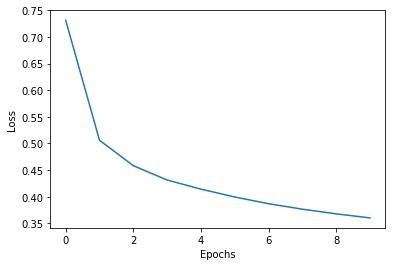

In [0]:
x_vals = list(range(10))
y_vals = history.history['loss']

plt.plot(x_vals, y_vals)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

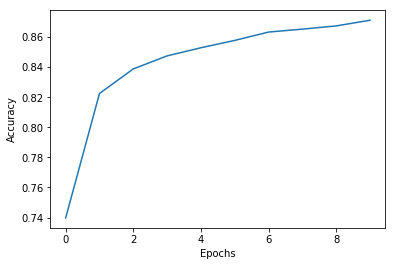

In [0]:
x_vals = list(range(10))
y_vals = history.history['acc']

plt.plot(x_vals, y_vals)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Extra Layer + Batch size = 16

In [4]:
mnist_model = Sequential()

# Hidden
mnist_model.add(Dense(128, input_dim=784, activation='relu'))
mnist_model.add(Dropout(0.2))
mnist_model.add(Dense(16, activation='relu'))
mnist_model.add(Dropout(0.2))

# Output Layer
mnist_model.add(Dense(10, activation='softmax'))

mnist_model.compile(loss='categorical_crossentropy',
                    optimizer='adam', 
                    metrics=['accuracy'])

W0717 23:53:34.186381 139916529063808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 23:53:34.209363 139916529063808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 23:53:34.213424 139916529063808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 23:53:34.234465 139916529063808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0717 23:53:34.246846 

In [5]:
%%time
history = mnist_model.fit(X_train, y_train, epochs=10, batch_size=16,
                          validation_split=.1, verbose=1)

W0717 23:53:40.490031 139916529063808 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 11s 212us/step - loss: 0.6751 - acc: 0.7580 - val_loss: 0.4321 - val_acc: 0.8425
Epoch 2/10
54000/54000 [==============================] - 11s 203us/step - loss: 0.4992 - acc: 0.8225 - val_loss: 0.4015 - val_acc: 0.8552
Epoch 3/10
54000/54000 [==============================] - 11s 196us/step - loss: 0.4612 - acc: 0.8385 - val_loss: 0.3779 - val_acc: 0.8625
Epoch 4/10
54000/54000 [==============================] - 11s 201us/step - loss: 0.4365 - acc: 0.8455 - val_loss: 0.3741 - val_acc: 0.8643
Epoch 5/10
54000/54000 [==============================] - 10s 194us/step - loss: 0.4165 - acc: 0.8509 - val_loss: 0.3607 - val_acc: 0.8682
Epoch 6/10
54000/54000 [==============================] - 11s 209us/step - loss: 0.4049 - acc: 0.8564 - val_loss: 0.3540 - val_acc: 0.8672
Epoch 7/10
54000/54000 [==============================] - 11s 196us/step - loss: 0.3905 - acc: 0.8615 - val_loss: 0.3

In [6]:
scores = mnist_model.evaluate(X_test, y_test)
print(f'{mnist_model.metrics_names[1]}: {scores[1]*100}')

10000/10000 [==============================] - 0s 28us/step
acc: 86.71


## Try more epochs:

In [28]:
mnist_model = Sequential()

# Hidden
mnist_model.add(Dense(260, input_dim=784, activation='relu'))
mnist_model.add(Dropout(0.15))
mnist_model.add(Dense(32, activation='relu'))
mnist_model.add(Dropout(0.15))

# Output Layer
mnist_model.add(Dense(10, activation='softmax'))

mnist_model.compile(loss='categorical_crossentropy',
                    optimizer='adam', 
                    metrics=['accuracy'])
mnist_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 260)               204100    
_________________________________________________________________
dropout_11 (Dropout)         (None, 260)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 32)                8352      
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                330       
Total params: 212,782
Trainable params: 212,782
Non-trainable params: 0
_________________________________________________________________


In [29]:
%%time
history = mnist_model.fit(X_train, y_train, epochs=50, batch_size=128,
                          validation_split=.15, verbose=1)

Train on 51000 samples, validate on 9000 samples
Epoch 1/50
51000/51000 [==============================] - 8s 164us/step - loss: 0.6842 - acc: 0.7629 - val_loss: 0.4382 - val_acc: 0.8447
Epoch 2/50
51000/51000 [==============================] - 7s 137us/step - loss: 0.4444 - acc: 0.8422 - val_loss: 0.4103 - val_acc: 0.8487
Epoch 3/50
51000/51000 [==============================] - 7s 138us/step - loss: 0.3944 - acc: 0.8591 - val_loss: 0.3600 - val_acc: 0.8711
Epoch 4/50
51000/51000 [==============================] - 7s 142us/step - loss: 0.3637 - acc: 0.8685 - val_loss: 0.3467 - val_acc: 0.8767
Epoch 5/50
51000/51000 [==============================] - 7s 136us/step - loss: 0.3464 - acc: 0.8744 - val_loss: 0.3383 - val_acc: 0.8813
Epoch 6/50
51000/51000 [==============================] - 7s 130us/step - loss: 0.3339 - acc: 0.8763 - val_loss: 0.3404 - val_acc: 0.8781
Epoch 7/50
51000/51000 [==============================] - 7s 131us/step - loss: 0.3214 - acc: 0.8831 - val_loss: 0.3286 - v

In [30]:
scores = mnist_model.evaluate(X_test, y_test)
print(f'{mnist_model.metrics_names[1]}: {scores[1]*100}')

10000/10000 [==============================] - 0s 41us/step
acc: 89.53


## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.